In [1]:
import importlib
import numpy as np
import gvar as gv
import sys
sys.path.append('../')
# from h5glance import H5Glance 
import os
import lsqfit
import io
import yaml
import h5py as h5
import warnings  
import tqdm
import matplotlib
from matplotlib.backends.backend_pdf import PdfPages


warnings.simplefilter(action="default")
warnings.filterwarnings('ignore') 
os.chdir('../../hyperon-xpt-master')

import xpt.fit_analysis as xfa 
import xpt.fit_routine as fit
import xpt.i_o as i_o
import xpt.priors as priors
import corr_fitter.corr_fit_analysis as fa
import corr_fitter.load_data_priors as ld
import corr_fitter.bs_analysis as bs_analysis
import corr_fitter.bs_utils as bs


In [2]:
input_output = i_o.InputOutput()
scale_setting_data = input_output.get_scale_setting_data()
hyperon_data = ld.get_hyperon_posterior(bs_data=scale_setting_data)

    # data,ensembles = input_output.get_data(scheme='w0_imp',units='Fpi')
    # data_div, ensembles = input_output.get_data(scheme='w0_imp',units='Fpi')
    # prior = input_output.make_prior(data,priors)
    # phys_point_data = input_output.get_data_phys_point()

In [3]:
fit_results = {}
import os.path
import pprint

fit_results = {}
directory = 'fit_results/'

with h5.File('/home/gmoney/lqcd/data/c51_2pt_octet_decuplet.h5', "r") as f:
    ens = sorted(list(f.keys()))
    print(ens)
    for key in ens:
        file_path = directory + key + '/all/hyperons'
        if os.path.isfile(file_path):
            fit_results[key] = gv.load(file_path)
        else:
            print(f"File not found for key {key}")
pprint.pprint(fit_results)

['a06m220L', 'a06m310', 'a06m310L', 'a09m135', 'a09m220', 'a09m220_new_old', 'a09m220_o', 'a09m260', 'a09m310', 'a09m310_new_old', 'a09m310_o', 'a09m350', 'a09m400', 'a12m130', 'a12m180L', 'a12m180S', 'a12m220', 'a12m220L', 'a12m220S', 'a12m220XL', 'a12m220_ms', 'a12m220_new_old', 'a12m220_o', 'a12m260', 'a12m310', 'a12m310L', 'a12m310XL', 'a12m350', 'a12m400', 'a15m130', 'a15m135XL', 'a15m220', 'a15m260', 'a15m310', 'a15m310L', 'a15m310L_new_old', 'a15m310L_o', 'a15m350', 'a15m400']
File not found for key a06m310
File not found for key a09m220
File not found for key a09m220_new_old
File not found for key a09m310
File not found for key a09m310_new_old
File not found for key a12m130
File not found for key a12m180L
File not found for key a12m180S
File not found for key a12m220
File not found for key a12m220L
File not found for key a12m220S
File not found for key a12m220XL
File not found for key a12m220_ms
File not found for key a12m220_new_old
File not found for key a12m220_o
File not fo

Least Square Fit:
  chi2/dof [dof] = 1.5 [104]    Q = 0.00087    logGBF = 2613.9

Parameters:
   sigma_st_z_PS 0      1.702(58)e-06        [  0.0(3.3)e-05 ]  
                 1       6.38(29)e-06        [  0.0(3.3)e-05 ]  
   sigma_st_z_SS 0       5.54(18)e-07        [ 0.000012 (12) ]  
                 1      1.144(31)e-06        [ 0.000012 (12) ]  
      sigma_z_PS 0      2.299(24)e-06        [  0.0(3.3)e-05 ]  
                 1       7.61(20)e-06        [  0.0(3.3)e-05 ]  
      sigma_z_SS 0      6.317(62)e-07        [ 0.000012 (12) ]  
                 1      1.124(25)e-06        [ 0.000012 (12) ]  
        lam_z_PS 0      2.264(22)e-06        [  0.0(3.3)e-05 ]  
                 1       7.42(23)e-06        [  0.0(3.3)e-05 ]  
        lam_z_SS 0      6.212(57)e-07        [  4.4(4.4)e-06 ]  
                 1      1.113(29)e-06        [  4.4(4.4)e-06 ]  
        proton_E 0          0.51 (22)        [     0.51 (22) ]  
                 1          0.7 (2.2)        [     0.7 (2.2) 

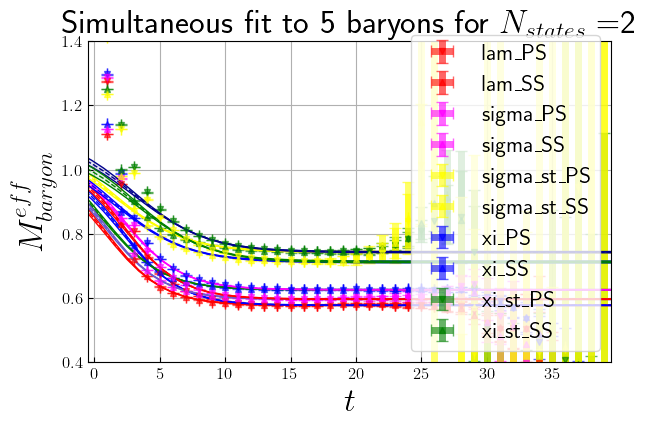

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [4]:
abbr = 'a09m400'
file = '/home/gmoney/lqcd/data/c51_2pt_octet_decuplet.h5'
fit_params = '/home/gmoney/lqcd/hyperon-xpt-master/tests/input_files/{0}.py'.format(abbr)
model_type = 'all'
hyperon_fit = fa.analyze_hyperon_corrs(file,fit_params,model_type=model_type,
                                       bs=False,bs_file='data/hyperon_bs_data.h5',
                                       bs_path=abbr,bs_N=100,bs_seed=abbr)
my_fit = hyperon_fit.get_fit()
out_path = 'fit_results/{0}/{1}/'.format(abbr,model_type)
ld.pickle_out(fit_out=my_fit,out_path=out_path,species="hyperons")
plot1 = hyperon_fit.return_best_fit_info()
plot2 = hyperon_fit.plot_effective_mass(t_plot_min=0, t_plot_max=40,model_type=model_type, 
show_plot=True,show_fit=True)

output_dir = '/home/gmoney/lqcd/hyperon-xpt-master/fit_results/{0}/{1}_{0}'.format(abbr,model_type)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
output_pdf = os.path.join(output_dir,'output.pdf')
with PdfPages(output_pdf) as pp:
    pp.savefig(plot1)
    pp.savefig(plot2)

import pandas as pd
from tabulate import tabulate

params_df = pd.DataFrame.from_records([my_fit.p])

with open('fit.pdf','w') as f:
    f.write(tabulate(params_df,headers='keys',tablefmt='pdf'))




In [ ]:
input_output = i_o.InputOutput()
new_prior = priors.prior
data,ens = input_output.get_data(units='lam_chi')
print(data)
# new_prior = input_output.make_prior(data,prior)
phys_point_data = input_output.get_data_phys_point()
from importlib import reload
importlib.reload(xfa)
importlib.reload(i_o)
xi_fit = fit.FitRoutine(data=data,prior=new_prior,model_info=xi_models['s_n2lo:d_n2lo:x_n2lo:l_n2lo'])
print(xi_fit.fit)
# xi_system_analysis = xfa.fit_analysis(phys_point_data=phys_point_data,data=data,model_info=xi_models['s_n2lo:d_n2lo:x_n2lo'])
# print(xi_system_analysis.fitter)
# # extrap_mass = xi_system_analysis.fitfcn(particle='xi')
# # extrap_mass_phys = extrap_mass * phys_point_data['lam_chi's
# #test = fit_analysis.fitfcn(particle='sigma_pi')
# print(extrap_mass)

{'lam_E0': array([1253.7(9.1)], dtype=object), 'sigma_E0': array([1299.0(9.5)], dtype=object), 'sigma_st_E0': array([1560(11)], dtype=object), 'xi_st_E0': array([1625(12)], dtype=object), 'xi_E0': array([1358.9(9.9)], dtype=object), 'm_omega': array([1671(12)], dtype=object), 'm_pi': array([398.0(2.9)], dtype=object), 'm_k': array([561.3(4.1)], dtype=object), 'lam_chi': array([1333.1(9.7)], dtype=object), 'eps2_a': array([0.13446(16)], dtype=object)}


NameError: name 'xi_models' is not defined

In [ ]:
input_output = i_o.InputOutput()
new_prior = priors.prior
data,ens = input_output.get_data(units='lam_chi')
print(data)
# new_prior = input_output.make_prior(data,prior)
phys_point_data = input_output.get_data_phys_point()
from importlib import reload
importlib.reload(xfa)
importlib.reload(i_o)
xi_fit = fit.FitRoutine(data=data,prior=new_prior,model_info=xi_models['s_n2lo:d_n2lo:x_n2lo:l_n2lo'])
print(xi_fit.fit)
# xi_system_analysis = xfa.fit_analysis(phys_point_data=phys_point_data,data=data,model_info=xi_models['s_n2lo:d_n2lo:x_n2lo'])
# print(xi_system_analysis.fitter)
# # extrap_mass = xi_system_analysis.fitfcn(particle='xi')
# # extrap_mass_phys = extrap_mass * phys_point_data['lam_chi's
# #test = fit_analysis.fitfcn(particle='sigma_pi')
# print(extrap_mass)

{'lam_E0': array([1253.7(9.1)], dtype=object), 'sigma_E0': array([1299.0(9.5)], dtype=object), 'sigma_st_E0': array([1560(11)], dtype=object), 'xi_st_E0': array([1625(12)], dtype=object), 'xi_E0': array([1358.9(9.9)], dtype=object), 'm_omega': array([1671(12)], dtype=object), 'm_pi': array([398.0(2.9)], dtype=object), 'm_k': array([561.3(4.1)], dtype=object), 'lam_chi': array([1333.1(9.7)], dtype=object), 'eps2_a': array([0.13446(16)], dtype=object)}
Least Square Fit:
  chi2/dof [dof] = 0.095 [2]    Q = 0.91    logGBF = -16.141

Parameters:
       m_{xi,0}       1277 (608)       [  1000 (1000) ]  
         s_{xi}        0.8 (4.4)       [    0.0 (5.0) ]  
       b_{xi,4}      0.07 (5.00)       [    0.0 (5.0) ]  
       d_{xi,a}        0.05 (99)       [    0.0 (1.0) ]  
      d_{xi,aa}    0.006 (1.000)       [    0.0 (1.0) ]  
      d_{xi,al}    0.004 (1.000)       [    0.0 (1.0) ]  
       d_{xi,s}     -0.03 (1.00)       [    0.0 (1.0) ]  
      d_{xi,as}   -0.004 (1.000)       [    0.0

In [ ]:
# initialize xpt models

f = open('xpt/models.yaml', 'r')
models = yaml.load(f,Loader=yaml.FullLoader)
    #print(keys)
model_info = {}

## Xi, Xi* system SU(2) HBXPT extrapolation ##

In [ ]:
xi_models = {}
for key,item in models['models']['xi_system'].items():
    xi_models[key] = item

xi_models

{'s_n2lo:d_n2lo:x_n2lo:l_n2lo': {'particles': ['xi', 'xi_st'],
  'eps2a_defn': 'w0_imp',
  'order_chiral': 'n2lo',
  'order_disc': 'n2lo',
  'order_strange': 'n2lo',
  'order_light': 'n2lo',
  'xpt': True,
  'fv': True},
 's_n2lo:d_n2lo:x_nlo': {'particles': ['xi', 'xi_st'],
  'eps2a_defn': 'w0_imp',
  'order_chiral': 'nlo',
  'order_disc': 'n2lo',
  'order_strange': 'n2lo',
  'order_light': 'n2lo',
  'xpt': True,
  'fv': True},
 's_n2lo:d_nlo:x_nlo': {'particles': ['xi', 'xi_st'],
  'eps2a_defn': 'w0_imp',
  'order_chiral': 'nlo',
  'order_disc': 'nlo',
  'order_strange': 'n2lo',
  'xpt': True,
  'fv': True},
 's_nlo:d_nlo:x_nlo': {'particles': ['xi', 'xi_st'],
  'eps2a_defn': 'w0_imp',
  'order_chiral': 'nlo',
  'order_disc': 'nlo',
  'order_strange': 'nlo',
  'xpt': True,
  'fv': True},
 's_nlo:d_lo:x_nlo': {'particles': ['xi', 'xi_st'],
  'eps2a_defn': 'w0_imp',
  'order_chiral': 'nlo',
  'order_disc': 'lo',
  'order_strange': 'nlo',
  'xpt': True,
  'fv': True},
 's_lo:d_lo:x_nlo'

In [ ]:
input_output = i_o.InputOutput()
new_prior = priors.prior
data,ens = input_output.get_data(units='lam_chi')
print(data)
# new_prior = input_output.make_prior(data,prior)
phys_point_data = input_output.get_data_phys_point()
from importlib import reload
importlib.reload(xfa)
importlib.reload(i_o)
xi_fit = fit.FitRoutine(data=data,prior=new_prior,model_info=xi_models['s_n2lo:d_n2lo:x_n2lo:l_n2lo'])
print(xi_fit.fit)
# xi_system_analysis = xfa.fit_analysis(phys_point_data=phys_point_data,data=data,model_info=xi_models['s_n2lo:d_n2lo:x_n2lo'])
# print(xi_system_analysis.fitter)
# # extrap_mass = xi_system_analysis.fitfcn(particle='xi')
# # extrap_mass_phys = extrap_mass * phys_point_data['lam_chi's
# #test = fit_analysis.fitfcn(particle='sigma_pi')
# print(extrap_mass)

{'lam_E0': array([1253.7(9.1)], dtype=object), 'sigma_E0': array([1299.0(9.5)], dtype=object), 'sigma_st_E0': array([1560(11)], dtype=object), 'xi_st_E0': array([1625(12)], dtype=object), 'xi_E0': array([1358.9(9.9)], dtype=object), 'm_omega': array([1671(12)], dtype=object), 'm_pi': array([398.0(2.9)], dtype=object), 'm_k': array([561.3(4.1)], dtype=object), 'lam_chi': array([1333.1(9.7)], dtype=object), 'eps2_a': array([0.13446(16)], dtype=object)}
Least Square Fit:
  chi2/dof [dof] = 0.095 [2]    Q = 0.91    logGBF = -16.141

Parameters:
       m_{xi,0}       1277 (608)       [  1000 (1000) ]  
         s_{xi}        0.8 (4.4)       [    0.0 (5.0) ]  
       b_{xi,4}      0.07 (5.00)       [    0.0 (5.0) ]  
       d_{xi,a}        0.05 (99)       [    0.0 (1.0) ]  
      d_{xi,aa}    0.006 (1.000)       [    0.0 (1.0) ]  
      d_{xi,al}    0.004 (1.000)       [    0.0 (1.0) ]  
       d_{xi,s}     -0.03 (1.00)       [    0.0 (1.0) ]  
      d_{xi,as}   -0.004 (1.000)       [    0.0

In [ ]:
input_output = i_o.InputOutput()
new_prior = priors.prior
data,ens = input_output.get_data(units='lam_chi')
print(data)
# new_prior = input_output.make_prior(data,prior)
phys_point_data = input_output.get_data_phys_point()
from importlib import reload
importlib.reload(xfa)
importlib.reload(i_o)
xi_fit = fit.FitRoutine(data=data,prior=new_prior,model_info=xi_models['s_n2lo:d_n2lo:x_n2lo:l_n2lo'])
print(xi_fit.fit)
# xi_system_analysis = xfa.fit_analysis(phys_point_data=phys_point_data,data=data,model_info=xi_models['s_n2lo:d_n2lo:x_n2lo'])
# print(xi_system_analysis.fitter)
# # extrap_mass = xi_system_analysis.fitfcn(particle='xi')
# # extrap_mass_phys = extrap_mass * phys_point_data['lam_chi's
# #test = fit_analysis.fitfcn(particle='sigma_pi')
# print(extrap_mass)

{'lam_E0': array([1253.7(9.1)], dtype=object), 'sigma_E0': array([1299.0(9.5)], dtype=object), 'sigma_st_E0': array([1560(11)], dtype=object), 'xi_st_E0': array([1625(12)], dtype=object), 'xi_E0': array([1358.9(9.9)], dtype=object), 'm_omega': array([1671(12)], dtype=object), 'm_pi': array([398.0(2.9)], dtype=object), 'm_k': array([561.3(4.1)], dtype=object), 'lam_chi': array([1333.1(9.7)], dtype=object), 'eps2_a': array([0.13446(16)], dtype=object)}
Least Square Fit:
  chi2/dof [dof] = 0.095 [2]    Q = 0.91    logGBF = -16.141

Parameters:
       m_{xi,0}       1277 (608)       [  1000 (1000) ]  
         s_{xi}        0.8 (4.4)       [    0.0 (5.0) ]  
       b_{xi,4}      0.07 (5.00)       [    0.0 (5.0) ]  
       d_{xi,a}        0.05 (99)       [    0.0 (1.0) ]  
      d_{xi,aa}    0.006 (1.000)       [    0.0 (1.0) ]  
      d_{xi,al}    0.004 (1.000)       [    0.0 (1.0) ]  
       d_{xi,s}     -0.03 (1.00)       [    0.0 (1.0) ]  
      d_{xi,as}   -0.004 (1.000)       [    0.0

In [ ]:
input_output = i_o.InputOutput()
new_prior = priors.prior
data,ens = input_output.get_data(units='lam_chi')
print(data)
# new_prior = input_output.make_prior(data,prior)
phys_point_data = input_output.get_data_phys_point()
from importlib import reload
importlib.reload(xfa)
importlib.reload(i_o)
xi_fit = fit.FitRoutine(data=data,prior=new_prior,model_info=xi_models['s_n2lo:d_n2lo:x_n2lo:l_n2lo'])
print(xi_fit.fit)
# xi_system_analysis = xfa.fit_analysis(phys_point_data=phys_point_data,data=data,model_info=xi_models['s_n2lo:d_n2lo:x_n2lo'])
# print(xi_system_analysis.fitter)
# # extrap_mass = xi_system_analysis.fitfcn(particle='xi')
# # extrap_mass_phys = extrap_mass * phys_point_data['lam_chi's
# #test = fit_analysis.fitfcn(particle='sigma_pi')
# print(extrap_mass)

{'lam_E0': array([1253.7(9.1)], dtype=object), 'sigma_E0': array([1299.0(9.5)], dtype=object), 'sigma_st_E0': array([1560(11)], dtype=object), 'xi_st_E0': array([1625(12)], dtype=object), 'xi_E0': array([1358.9(9.9)], dtype=object), 'm_omega': array([1671(12)], dtype=object), 'm_pi': array([398.0(2.9)], dtype=object), 'm_k': array([561.3(4.1)], dtype=object), 'lam_chi': array([1333.1(9.7)], dtype=object), 'eps2_a': array([0.13446(16)], dtype=object)}
Least Square Fit:
  chi2/dof [dof] = 0.095 [2]    Q = 0.91    logGBF = -16.141

Parameters:
       m_{xi,0}       1277 (608)       [  1000 (1000) ]  
         s_{xi}        0.8 (4.4)       [    0.0 (5.0) ]  
       b_{xi,4}      0.07 (5.00)       [    0.0 (5.0) ]  
       d_{xi,a}        0.05 (99)       [    0.0 (1.0) ]  
      d_{xi,aa}    0.006 (1.000)       [    0.0 (1.0) ]  
      d_{xi,al}    0.004 (1.000)       [    0.0 (1.0) ]  
       d_{xi,s}     -0.03 (1.00)       [    0.0 (1.0) ]  
      d_{xi,as}   -0.004 (1.000)       [    0.0

In [ ]:
input_output = i_o.InputOutput()
new_prior = priors.prior
data,ens = input_output.get_data(units='lam_chi')
print(data)
# new_prior = input_output.make_prior(data,prior)
phys_point_data = input_output.get_data_phys_point()
from importlib import reload
importlib.reload(xfa)
importlib.reload(i_o)
xi_fit = fit.FitRoutine(data=data,prior=new_prior,model_info=xi_models['s_n2lo:d_n2lo:x_n2lo:l_n2lo'])
print(xi_fit.fit)
# xi_system_analysis = xfa.fit_analysis(phys_point_data=phys_point_data,data=data,model_info=xi_models['s_n2lo:d_n2lo:x_n2lo'])
# print(xi_system_analysis.fitter)
# # extrap_mass = xi_system_analysis.fitfcn(particle='xi')
# # extrap_mass_phys = extrap_mass * phys_point_data['lam_chi's
# #test = fit_analysis.fitfcn(particle='sigma_pi')
# print(extrap_mass)

{'lam_E0': array([1253.7(9.1)], dtype=object), 'sigma_E0': array([1299.0(9.5)], dtype=object), 'sigma_st_E0': array([1560(11)], dtype=object), 'xi_st_E0': array([1625(12)], dtype=object), 'xi_E0': array([1358.9(9.9)], dtype=object), 'm_omega': array([1671(12)], dtype=object), 'm_pi': array([398.0(2.9)], dtype=object), 'm_k': array([561.3(4.1)], dtype=object), 'lam_chi': array([1333.1(9.7)], dtype=object), 'eps2_a': array([0.13446(16)], dtype=object)}
Least Square Fit:
  chi2/dof [dof] = 0.095 [2]    Q = 0.91    logGBF = -16.141

Parameters:
       m_{xi,0}       1277 (608)       [  1000 (1000) ]  
         s_{xi}        0.8 (4.4)       [    0.0 (5.0) ]  
       b_{xi,4}      0.07 (5.00)       [    0.0 (5.0) ]  
       d_{xi,a}        0.05 (99)       [    0.0 (1.0) ]  
      d_{xi,aa}    0.006 (1.000)       [    0.0 (1.0) ]  
      d_{xi,al}    0.004 (1.000)       [    0.0 (1.0) ]  
       d_{xi,s}     -0.03 (1.00)       [    0.0 (1.0) ]  
      d_{xi,as}   -0.004 (1.000)       [    0.0

In [ ]:
input_output = i_o.InputOutput()
new_prior = priors.prior
data,ens = input_output.get_data(units='lam_chi')
print(data)
# new_prior = input_output.make_prior(data,prior)
phys_point_data = input_output.get_data_phys_point()
from importlib import reload
importlib.reload(xfa)
importlib.reload(i_o)
xi_fit = fit.FitRoutine(data=data,prior=new_prior,model_info=xi_models['s_n2lo:d_n2lo:x_n2lo:l_n2lo'])
print(xi_fit.fit)
# xi_system_analysis = xfa.fit_analysis(phys_point_data=phys_point_data,data=data,model_info=xi_models['s_n2lo:d_n2lo:x_n2lo'])
# print(xi_system_analysis.fitter)
# # extrap_mass = xi_system_analysis.fitfcn(particle='xi')
# # extrap_mass_phys = extrap_mass * phys_point_data['lam_chi's
# #test = fit_analysis.fitfcn(particle='sigma_pi')
# print(extrap_mass)

{'lam_E0': array([1253.7(9.1)], dtype=object), 'sigma_E0': array([1299.0(9.5)], dtype=object), 'sigma_st_E0': array([1560(11)], dtype=object), 'xi_st_E0': array([1625(12)], dtype=object), 'xi_E0': array([1358.9(9.9)], dtype=object), 'm_omega': array([1671(12)], dtype=object), 'm_pi': array([398.0(2.9)], dtype=object), 'm_k': array([561.3(4.1)], dtype=object), 'lam_chi': array([1333.1(9.7)], dtype=object), 'eps2_a': array([0.13446(16)], dtype=object)}
Least Square Fit:
  chi2/dof [dof] = 0.095 [2]    Q = 0.91    logGBF = -16.141

Parameters:
       m_{xi,0}       1277 (608)       [  1000 (1000) ]  
         s_{xi}        0.8 (4.4)       [    0.0 (5.0) ]  
       b_{xi,4}      0.07 (5.00)       [    0.0 (5.0) ]  
       d_{xi,a}        0.05 (99)       [    0.0 (1.0) ]  
      d_{xi,aa}    0.006 (1.000)       [    0.0 (1.0) ]  
      d_{xi,al}    0.004 (1.000)       [    0.0 (1.0) ]  
       d_{xi,s}     -0.03 (1.00)       [    0.0 (1.0) ]  
      d_{xi,as}   -0.004 (1.000)       [    0.0

In [ ]:
['fit_div_lam = fit.fit_routine(prior=prior, data=data_div, model_info=model_info_div_lam)
fit_div_lam_out = fit_div_lam.fit
print(fit_div_lam_out)


SyntaxError: unterminated string literal (detected at line 1) (346027678.py, line 1)

In [ ]:
fit_sigma = fit.fit_routine(prior=prior, data=data, model_info=model_info_sigma)
fit_sigma_out = fit_sigma.fit
print(fit_sigma_out.y)

{
    'proton':
    array([1121(10), 958.4(7.7), 984.4(7.9), 1110.7(8.9), 1158.1(9.3),
           1211.3(9.7), 934.1(6.8), 998.3(7.3), 1074.4(7.8), 1124.0(8.2),
           1168.4(8.5), 950.8(6.3), 993.1(6.6), 1078.1(7.2), 1057.1(7.0),
           1092.9(7.3), 1158.1(7.7)], dtype=object),
}


In [ ]:
 fit_test = fit.fit_routine(prior=prior, data=data, model_info=model_info)
 fit_out = fit_test.fit
 print(fit_out.format(maxline=True))

Least Square Fit:
  chi2/dof [dof] = 1.3 [17]    Q = 0.17    logGBF = -85.26

Parameters:
     m_{proton,0}        902 (10)      [     900 (400) ]  
     b_{proton,2}     -6e-13 +- 5      [     0.0 (5.0) ]  
     b_{proton,4}     -4e-12 +- 5      [     0.0 (5.0) ]  
     b_{proton,6}       0.4 (5.0)      [     0.0 (5.0) ]  
     d_{proton,a}     -4e-13 +- 5      [     0.0 (5.0) ]  
    d_{proton,aa}      2e-12 +- 5      [     0.0 (5.0) ]  
    d_{proton,al}     -2e-12 +- 5      [     0.0 (5.0) ]  
   d_{proton,all}      -1.4 (4.9)      [     0.0 (5.0) ]  
   d_{proton,aal}       0.2 (1.0)      [     0.0 (5.0) ]  
     d_{proton,s}      -0.75 (74)      [     0.0 (5.0) ]  
    d_{proton,as}       8.7 (2.1)      [     0.0 (5.0) ]  *
    d_{proton,ls}      -2.5 (4.8)      [     0.0 (5.0) ]  
    d_{proton,ss}       2.8 (4.4)      [     0.0 (5.0) ]  
g_{proton,proton}     0.02 (4.99)      [     1.3 (5.0) ]  
 g_{proton,delta}      -1.13 (41)      [     0.9 (5.0) ]  
      m_{delta,0}      1

In [ ]:
from importlib import reload
reload(fa)
fit_analysis = fa.fit_analysis(phys_point_data=phys_point_data, data=data,model_info=model_info, prior=prior)
fit_analysis_sigma = fa.fit_analysis(phys_point_data=phys_point_data, data=data,model_info=model_info_sigma, prior=prior)
extrap_mass = fit_analysis.extrapolated_mass
extrap_mass_deriv = fit_analysis_sigma.extrapolated_mass
m_proton = extrap_mass['proton']
m_proton_deriv =  extrap_mass_deriv['proton']

{'proton': 944.0(7.1)}


In [ ]:
reload(io)
m_pi = phys_point_data['m_pi']
lam_chi = phys_point_data['lam_chi']
e_pi = m_pi / lam_chi
sigma = m_pi**2 *gv.deriv(m_proton, m_pi**2)
l3 = gv.gvar('3.53(26)')
l4 = gv.gvar('4.73(10)')
sigma_analytic = e_pi/2 * (1 + e_pi**2*(5/2 - l3/2 - 2*l4 )) *m_proton_deriv
print('sigma w/ gv.deriv:',sigma)
print('sigma analytic:' ,sigma_analytic)


sigma w/ gv.deriv: 53.12(24)
sigma analytic: 48.53(38)


In [ ]:
print(fit_analysis.error_budget)

KeyError: 'm_{proton,0}'